In [9]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('SP_SPX, 1M (1).csv')
df['time'] = df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
df['MoM_pct_change_close']= df['close'].pct_change(fill_method ='ffill')*100
df['monthly_rate_diff'] = df["USINTR, FEDERAL RESERVE: Open"].diff(periods = 1)

df.drop(columns = ['Basis' ,'Upper','Lower','EMA','USINTR, FEDERAL RESERVE: Open','USINTR, FEDERAL RESERVE: High','USINTR, FEDERAL RESERVE: Low','Smoothing Line','MA','Smoothing Line','Plot','Plot','MA','Smoothing Line','Volume','Volume MA', 'Smoothing Line.1', 'Plot.1','MA.1','Smoothing Line.2'], inplace=True)
# filter the time
filt = (df['time'] > '1975')

df[filt]

,time,open,high,low,close,"USINTR, FEDERAL RESERVE: Close",MoM_pct_change_close,monthly_rate_diff
977,1975-01-01,68.650002,78.690002,68.650002,76.980003,7.00,12.281221,-1.25
978,1975-02-03,76.980003,83.559998,76.000000,81.589996,6.00,5.988559,-1.00
979,1975-03-03,81.589996,87.080002,80.080002,83.360001,5.50,2.169390,-1.00
980,1975-04-01,83.360001,88.790001,79.660004,87.300003,5.25,4.726490,-0.50
981,1975-05-01,87.300003,93.510002,86.940002,91.150002,5.25,4.410079,-0.25
...,...,...,...,...,...,...,...,...
1545,2022-05-02,4130.610000,4307.660000,3810.320000,4132.160000,1.00,0.005808,0.50
1546,2022-06-01,4149.780000,4177.510000,3636.870000,3785.390000,1.75,-8.391979,0.75
1547,2022-07-01,3781.000000,4140.150000,3721.560000,4130.289000,2.50,9.111320,0.75
1548,2022-08-01,4112.380000,4325.280000,3954.530000,3954.990000,NaN,-4.244231,NaN


Text(0, 0.5, 'USINTR, FEDERAL RESERVE: Close')

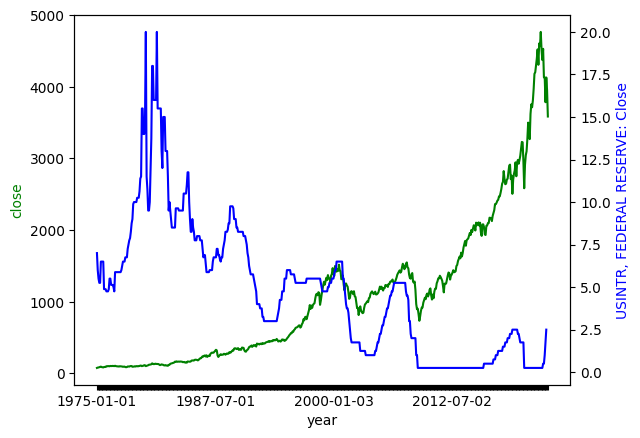

In [11]:
# set timeframe as you whish
filt = (df['time'] > '1975')
df_tf = df[filt] 

x = df_tf['time']
y1 = df_tf['close']
y2 = df_tf['USINTR, FEDERAL RESERVE: Close']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('close', color='g')
ax2.set_ylabel('USINTR, FEDERAL RESERVE: Close', color='b')

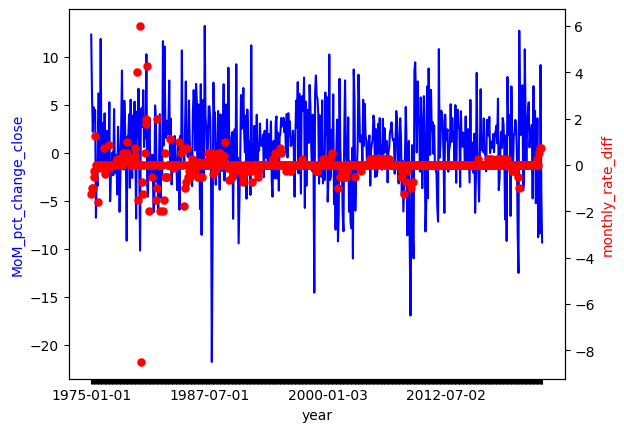

In [12]:
# set timeframe as you whish 
filt = (df['time'] > '1975')
df_tf = df[filt] 

x = df_tf['time']
y1 = df_tf['MoM_pct_change_close']
y2 = df_tf['monthly_rate_diff']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b-')
ax2.scatter(x, y2, marker='o', linewidths= 0.1, c= 'red')

# timestamps were too close, slicker solution surely exsist, probably with locator params
every_nth = 150
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

ax1.set_xlabel('year')
ax1.set_ylabel('MoM_pct_change_close', color='b')
ax2.set_ylabel('monthly_rate_diff', color='r')

#observe % price changes plotet along monthly rate changes
plt.show()

In [13]:
#observe correlation 
filt = (df['time'] > '1975')
df_tf = df[filt] 

df_tf['close'].corr(df['USINTR, FEDERAL RESERVE: Close'], method='pearson', min_periods=1)

-0.6453411708830993

In [14]:
# we are interested in positive correlation in rising rates environments
filt = (df['time'] > '1975')
df_tf = df[filt] 

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2]

/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21439/3927801379.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf[filt2]


,time,open,high,low,close,"USINTR, FEDERAL RESERVE: Close",MoM_pct_change_close,monthly_rate_diff
982,1975-06-02,91.320000,95.849998,89.300003,95.190002,6.50,4.432254,1.25
993,1976-05-03,101.639999,103.989998,98.260002,100.180000,5.50,-1.436441,0.75
1000,1976-12-01,102.099998,107.820000,101.620003,107.459999,5.88,5.249756,0.88
1009,1977-09-01,96.769997,98.430000,94.440002,96.529999,6.25,-0.248009,0.12
1010,1977-10-03,96.529999,97.269997,90.199997,92.339996,6.50,-4.340623,0.25
...,...,...,...,...,...,...,...,...
1501,2018-09-04,2896.960000,2940.910000,2864.120000,2913.980000,2.25,0.429430,0.25
1504,2018-12-03,2790.500000,2800.180000,2346.580000,2506.850000,2.50,-9.177696,0.25
1545,2022-05-02,4130.610000,4307.660000,3810.320000,4132.160000,1.00,0.005808,0.50
1546,2022-06-01,4149.780000,4177.510000,3636.870000,3785.390000,1.75,-8.391979,0.75


In [15]:
filt = (df['time'] > '1975')
df_tf = df[filt]

filt2 = (df['USINTR, FEDERAL RESERVE: Close'] >= 1) & (df['monthly_rate_diff'] > 0)
df_tf[filt2]

df_tf_high_rates_with_hiking = df_tf[filt2]

#calculate correlation in risig rates environemnts
df_tf_high_rates_with_hiking['close'].corr(df['USINTR, FEDERAL RESERVE: Close'], method='pearson', min_periods=1)

/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21439/2001452413.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf[filt2]
/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_21439/2001452413.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tf_high_rates_with_hiking = df_tf[filt2]


-0.6509782961472733